In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
import sys
print(sys.version)
# Last checked output with working code: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


Don't forget to run this cell below! Or else the tensorflow compiler version will not be recent enough for the model to compile

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 104.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 118.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 89.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 45.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
   

In [ ]:
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__) # Last checked working with tensorflow 2.16.2
print(keras.__version__) # Last checked working with keras 3.4.1

2.16.2
3.4.1


In [ ]:
from keras.models import load_model
loaded_model = keras.models.load_model('/gdrive/MyDrive/emoKaggleModels/model518c4.h5')

In [ ]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           7,175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,609 (8.95 MB)

 Trainable params: 2,345,607 (8.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

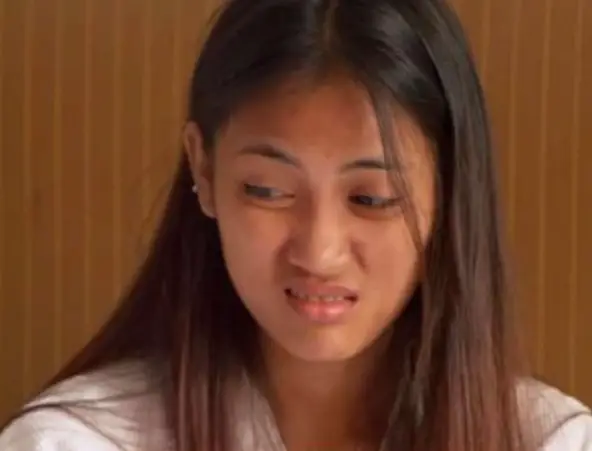

-1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

face_cascades_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_detector = cv2.CascadeClassifier(face_cascades_path)

test_img_path = '/gdrive/MyDrive/emoTestFiles/disgustedRose.webp'

# read test image path
# used to read image with 0 for color channel parameter, resulted in different
# prediction results
test_img = cv2.imread(test_img_path)
cv2_imshow(test_img)
cv2.waitKey(0)


In [ ]:
####### TESTING CODE ##########

# import matplotlib.pyplot as plt
# import numpy as np

# facedata = '/content/haarcascade_frontalface_alt.xml/'
# cascade = cv2.CascadeClassifier(facedata)
# test_img_path = '/gdrive/MyDrive/emoTestFiles/theRock.jpg'

# # test_img = cv2.imread(test_img_path)

# test_img_resized = image.load_img(test_img_path, color_mode = "grayscale", target_size=(48, 48))

#
# test_img_arr = image.img_to_array(test_img_resized)
# test_img_arr = np.expand_dims(test_img_arr, axis = 0)
# test_img_arr /= 255

# plt.imshow(test_img_resized)

# pred = loaded_model.predict(test_img_arr)
# print(pred)

######

face detector successfully initialized


writing test image edited
UNedited test img used: /gdrive/MyDrive/emoTestFiles/disgustedRose.webp
EDITED test img used: /gdrive/MyDrive/emoImgsGrayAndCropped/croppedImgsTests/face.jpg


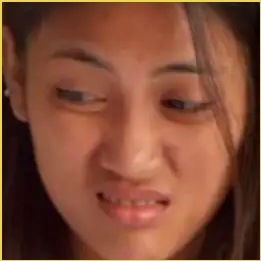

-1

In [ ]:
# Implement face detection algorithm
face = face_detector.detectMultiScale(test_img, 1.1, 4)
print('face detector successfully initialized')

# Specify path to save cropped image to
test_img_edited_path = '/gdrive/MyDrive/emoImgsGrayAndCropped/croppedImgsTests/face.jpg'

# Appparently this loop doesn't run at all sometimes...?
# might be because haarcascades can't detect a face like a dog face since it's not a human
for (x, y, w, h) in face:
  cv2.rectangle(test_img, (x, y), (x+w, y+h), (85, 212, 237), 2)
  faces = test_img[y:y + h, x:x + w]
  cv2_imshow(face)
  print('writing test image edited')
  cv2.imwrite(test_img_edited_path, faces)

print('UNedited test img used: ' + test_img_path)
print('EDITED test img used: ' + test_img_edited_path)

# Display the output
edited_test_img = cv2.imread(test_img_edited_path)
cv2_imshow(edited_test_img)
cv2.waitKey(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0.45499262 0.1609129  0.03685122 0.22651939 0.07403982 0.04621825
  0.00046582]]


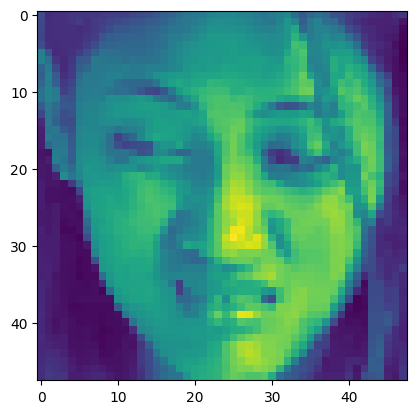

In [ ]:
test_img_resized = image.load_img(test_img_edited_path, color_mode = "grayscale", target_size=(48, 48))

test_img_arr = image.img_to_array(test_img_resized)
test_img_arr = np.expand_dims(test_img_arr, axis = 0)

test_img_arr /= 255 # This line takes test_img_arr, which stores rgb pixel values
                    # from 0-255, and divides those pixel values by 255 to "normalize" the pixel values (make the pixel values be in the range 0-1)
                    # this is supposed to make computation easier and faster for the model to do, since it doesn't have to deal with big numbers
                    # https://medium.com/analytics-vidhya/a-tip-a-day-python-tip-8-why-should-we-normalize-image-pixel-values-or-divide-by-255-4608ac5cd26a#:~:text=As%20the%20pixel%20values%20range,range%20from%200%20to%201.

plt.imshow(test_img_resized) # , cmap = 'gray')

pred = loaded_model.predict(test_img_arr)
print(pred)

In [ ]:
def graph_preds(pred_probs):
  emoTypes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
  y_pos = np.arange(len(emoTypes))
  plt.bar(emoTypes, pred_probs[0], width = 0.7)
  plt.xticks(y_pos, emoTypes)
  plt.ylabel('percentage  certain')
  plt.title("Emotion")

  plt.show()

In [ ]:
def get_dominant_emo(pred_probs):
  emo_dict = {
      'angry': pred_probs[0],
      'disgust': pred_probs[1],
      'fear': pred_probs[2],
      'happy': pred_probs[3],
      'sad': pred_probs[4],
      'surprise': pred_probs[5],
      'neutral': pred_probs[6]
  }

  dom_emo = max(emo_dict, key=emo_dict.get)
  dom_prob = max(emo_dict.values())
  print('I am ' + str(dom_prob*100) + '% sure that this emotion is ' + str(dom_emo))

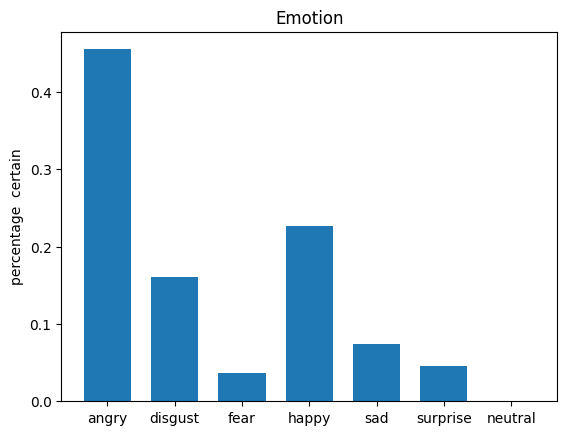

In [ ]:
graph_preds(pred)

In [ ]:
get_dominant_emo(pred[0])

I am 45.49926221370697% sure that this emotion is angry
